In [261]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc

plt.rcParams["font.family"] = "serif"
plt.rcParams["font.serif"] = ["cmr10", "cmsy10"]
plt.rcParams["mathtext.fontset"] = "cm"
plt.rcParams["axes.formatter.use_mathtext"] = True
plt.rcParams["figure.dpi"] = 300
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["legend.fontsize"] = 9
plt.rcParams["xtick.labelsize"] = 8
plt.rcParams["ytick.labelsize"] = 8
plt.rcParams["axes.grid"] = True


import Qubits

beta = 40
delta = 40

resolution = 50

In [262]:
singlemode = Qubits.gatemon_flux(resolution, delta/beta, delta, 0.0, 0)

multimode2 = Qubits.gatemon_flux(resolution, delta/beta, delta, [0.0, 0.0], 0)

multimode3 = Qubits.gatemon_flux(resolution, delta/beta, delta, [0.0, 0.0, 0.0], 0)


In [263]:
singlemode.solve()
multimode2.solve()
multimode3.solve() 

In [264]:
singlemode.eigvals[:4]

array([-38.91875655, -36.20269127, -32.32419501, -25.7680692 ])

In [265]:
multimode2.eigvals[:4]

array([-77.33518589, -72.26816139, -64.27070157, -52.50846437])

In [266]:
multimode3.eigvals[:4]

array([-115.35597111, -108.19903019,  -96.58623789,  -80.17729773])

In [267]:
singlemode.T_1_gamma()

array([3.17111272e-07, 6.32555698e-06])

In [268]:
multimode2.T_1_gamma()

array([6.75699182e-07, 4.69100709e-05])

In [269]:
multimode3.T_1_gamma()

array([9.80019860e-07, 1.35736432e-04])

Text(0, 0.5, 'Energy [GHZ$h$]')

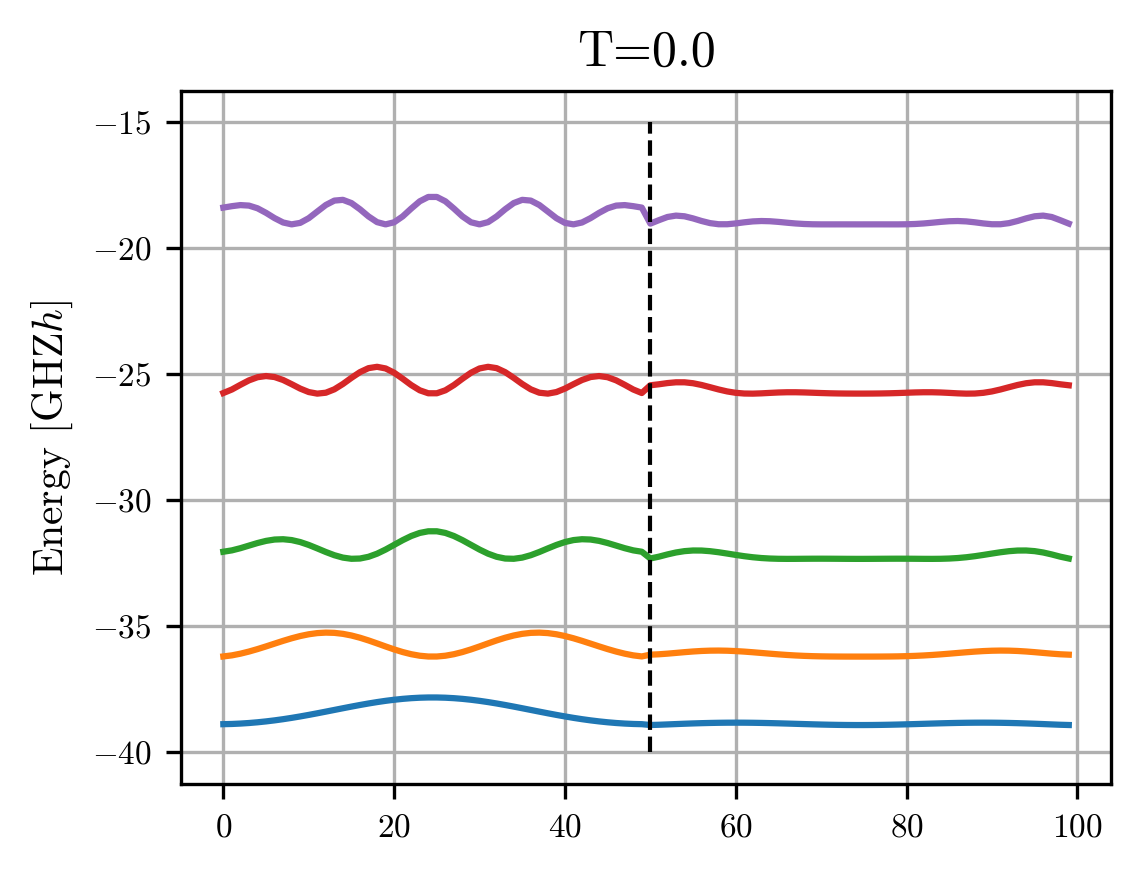

In [270]:
for i in range(5):
    plt.plot((np.conjugate(singlemode.eigvecs[:,i])* singlemode.eigvecs[:,i])*30 + singlemode.eigvals[i])


plt.vlines([resolution], -40, -15, linestyle = '--', color="black", linewidth = 1.0)
plt.title("T="+str(singlemode.T))
plt.ylabel(r"Energy [GHZ$h$]")

Text(0, 0.5, 'Energy [GHZ$h$]')

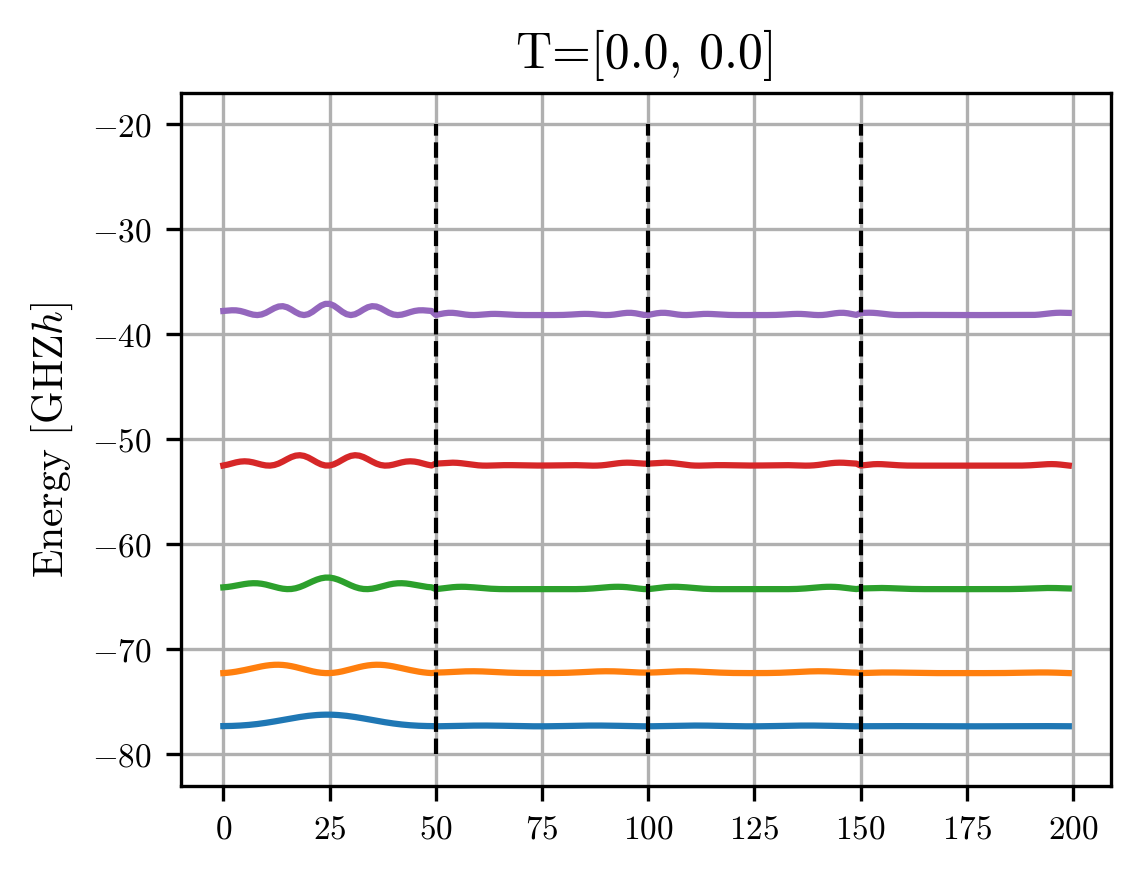

In [271]:
for i in range(5):
    plt.plot((np.conjugate(multimode2.eigvecs[:,i])* multimode2.eigvecs[:,i])*30 + multimode2.eigvals[i])

plt.vlines(np.array([1, 2, 3])*resolution, -80, -20, linestyle = '--', color="black", linewidth = 1.0)


plt.title("T="+str(multimode2.T))
plt.ylabel(r"Energy [GHZ$h$]")

Text(0, 0.5, 'Energy [GHZ$h$]')

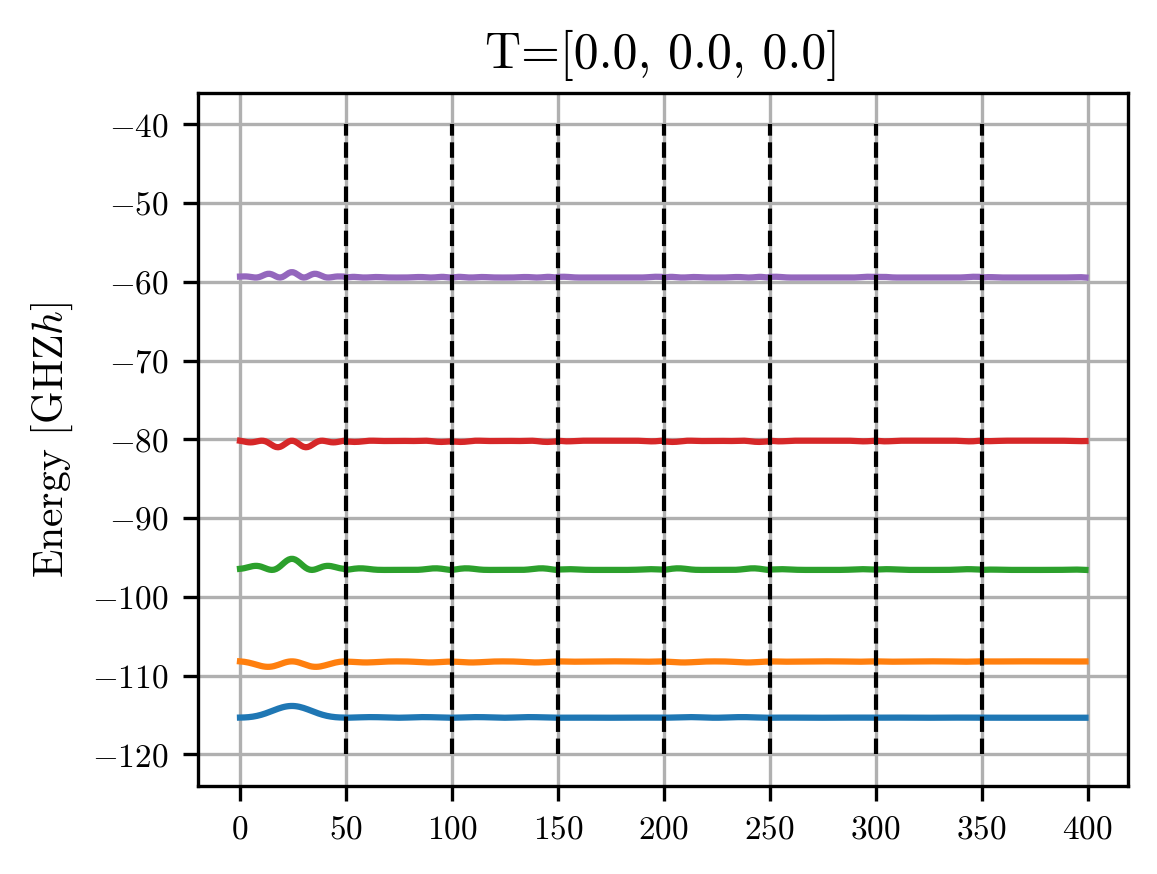

In [272]:
for i in range(5):
    plt.plot(np.conjugate((multimode3.eigvecs[:,i])* multimode3.eigvecs[:,i])*40 + multimode3.eigvals[i])

plt.vlines(np.array([1, 2, 3, 4, 5, 6, 7])*resolution, -120, -40, linestyle = '--', color="black", linewidth = 1.0)


plt.title("T="+str(multimode3.T))
plt.ylabel(r"Energy [GHZ$h$]")

In [273]:
resolution_arr = np.array(range(7, 60, 2))

energy_single = np.zeros((len(resolution_arr), 4))
energy_2 = np.zeros((len(resolution_arr), 4))
energy_3 = np.zeros((len(resolution_arr), 4))
energy_4 = np.zeros((len(resolution_arr), 4))

T1_single = np.zeros((len(resolution_arr), 2))
T1_2 = np.zeros((len(resolution_arr), 2))
T1_3 = np.zeros((len(resolution_arr), 2))
T1_4 = np.zeros((len(resolution_arr), 2))

singlemode.EC = delta/beta
multimode2.EC = delta/beta
multimode3.EC = delta/beta

singlemode.T = 0.8
multimode2.T = [0.8, 0.0]
multimode3.T = [0.8, 0.0, 0.0]

In [274]:
for i in range(len(resolution_arr)):
    singlemode.set_resolution(resolution_arr[i])
    multimode2.set_resolution(resolution_arr[i])
    multimode3.set_resolution(resolution_arr[i])

    singlemode.solve()
    multimode2.solve()
    multimode3.solve()

    energy_single[i,:] = singlemode.eigvals[:4] 
    energy_2[i,:] = multimode2.eigvals[:4] 
    energy_3[i,:] = multimode3.eigvals[:4] 

    gamma_single = singlemode.T_1_gamma()
    T1_single[i,:] = gamma_single
    gamma_2 = multimode2.T_1_gamma()
    T1_2[i,:] = gamma_2
    gamma_3 = multimode3.T_1_gamma()
    T1_3[i,:] = gamma_3
    



Text(0.5, 1.0, 'Convergence of energies')

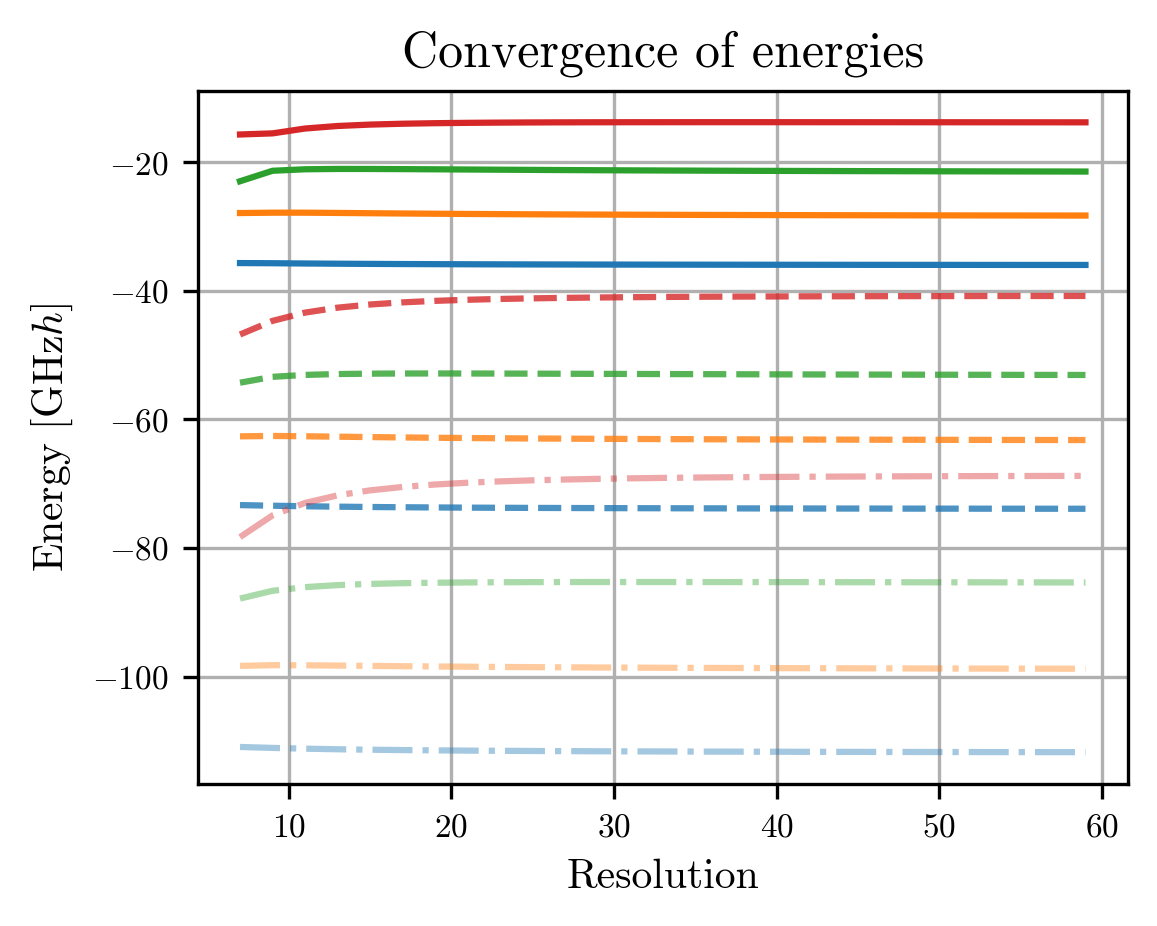

In [275]:
color_arr = ["C0", "C1", "C2", "C3", "C4", "C5"]

for i in range(4):
    plt.plot(resolution_arr, energy_single[:,i], color = color_arr[i])
    plt.plot(resolution_arr, energy_2[:,i], "--", alpha = 0.8, color = color_arr[i])
    plt.plot(resolution_arr, energy_3[:,i], "-.", alpha = 0.4, color = color_arr[i])


plt.xlabel("Resolution")
plt.ylabel(r"Energy [GHz$h$]")
plt.title("Convergence of energies")
#plt.ylim(-1, 2)
#T's are 0.8 [0.8, 0.0] and [0.8, 0.0, 0.0]

In [276]:
max_channels = 6
channels = np.array(range(1, max_channels+1))
E = np.zeros((max_channels, 5))

In [277]:
for i in range(max_channels):
    arr = np.ones(i+1)*0.0
    #arr[0] = 0.7
    print(arr)
    variable_channel = Qubits.gatemon_flux(60, delta/50, delta, arr, 0)
    #variable_channel.T = arr
    variable_channel.solve()

    E[i,:] = variable_channel.eigvals[:5]


[0.]
[0. 0.]
[0. 0. 0.]
[0. 0. 0. 0.]
[0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Energy [GHz$\\cdot h$]')

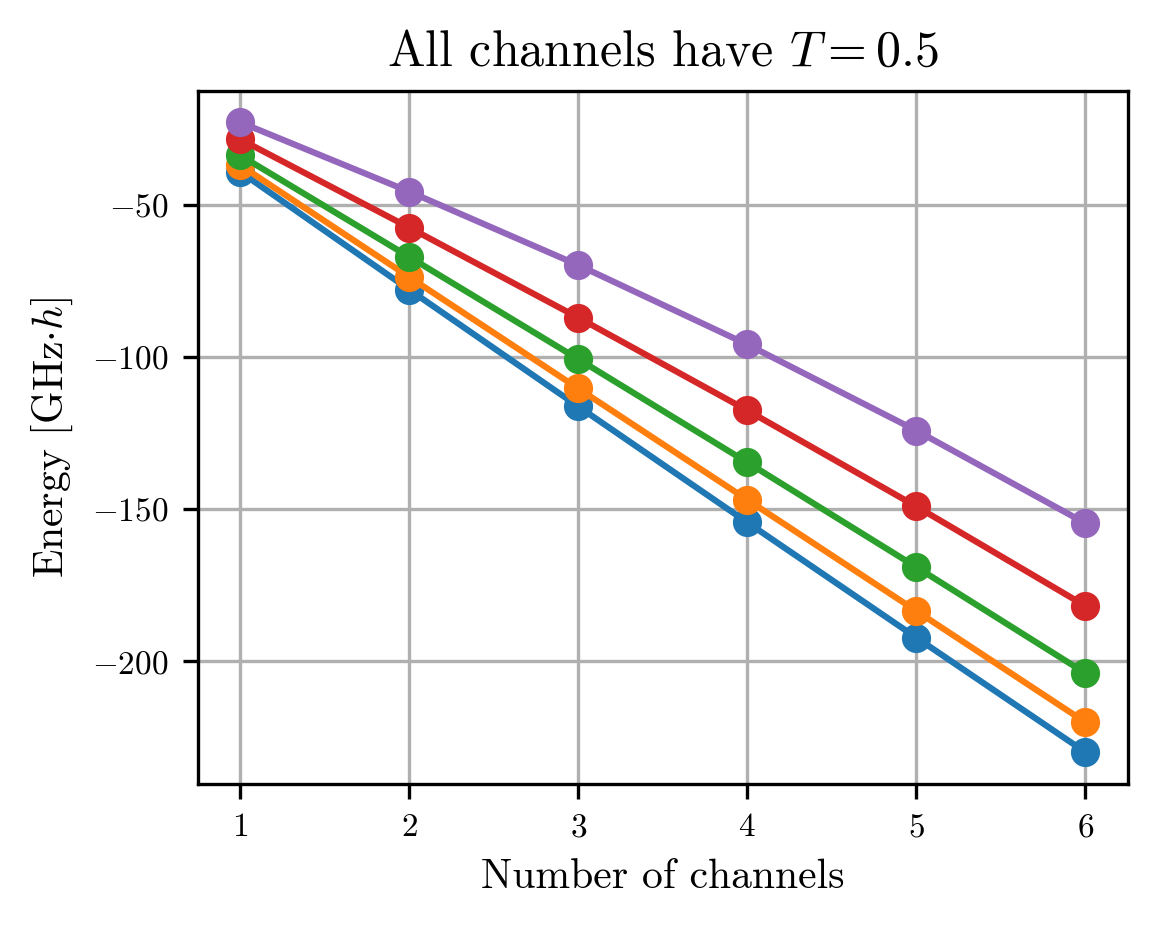

In [278]:
for i in range(5):
    plt.plot(channels, E[:,i], "-o")

plt.title(r"All channels have $T=0.5$")
plt.xlabel("Number of channels")
plt.ylabel(r"Energy [GHz$\cdot h$]")

In [279]:
E

array([[ -39.11918409,  -36.92864138,  -33.715126  ,  -28.43305868,
         -22.86691926],
       [ -77.83502295,  -73.7026297 ,  -67.095573  ,  -57.45948655,
         -45.65173735],
       [-116.22173555, -110.32044577, -100.67221474,  -87.04178532,
         -69.79818146],
       [-154.31897204, -146.87002854, -134.61174858, -117.51790815,
         -95.87694032],
       [-192.16415689, -183.41045786, -168.99798639, -149.0798171 ,
        -124.1634645 ],
       [-229.79157419, -219.97272571, -203.84801964, -181.75970854,
        -154.60610875]])

In [280]:
-37.15999924*np.array([1,2,3,4,5,6])

array([ -37.15999924,  -74.31999848, -111.47999772, -148.63999696,
       -185.7999962 , -222.95999544])

In [281]:
gamma = np.zeros((max_channels, 2))

for i in range(max_channels):
    arr = np.ones(i+1)*0.0
    arr[0] = 1.0
    print(arr)
    variable_channel = Qubits.gatemon_flux(40, delta/50, delta, arr, 0)
    variable_channel.solve()
    gamma[i,:] = variable_channel.T_1_gamma()

    E[i,:] = variable_channel.eigvals[:5]

[1.]
[1. 0.]
[1. 0. 0.]


[1. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0.]


Text(0, 0.5, 'Energy [GHz$\\cdot h$]')

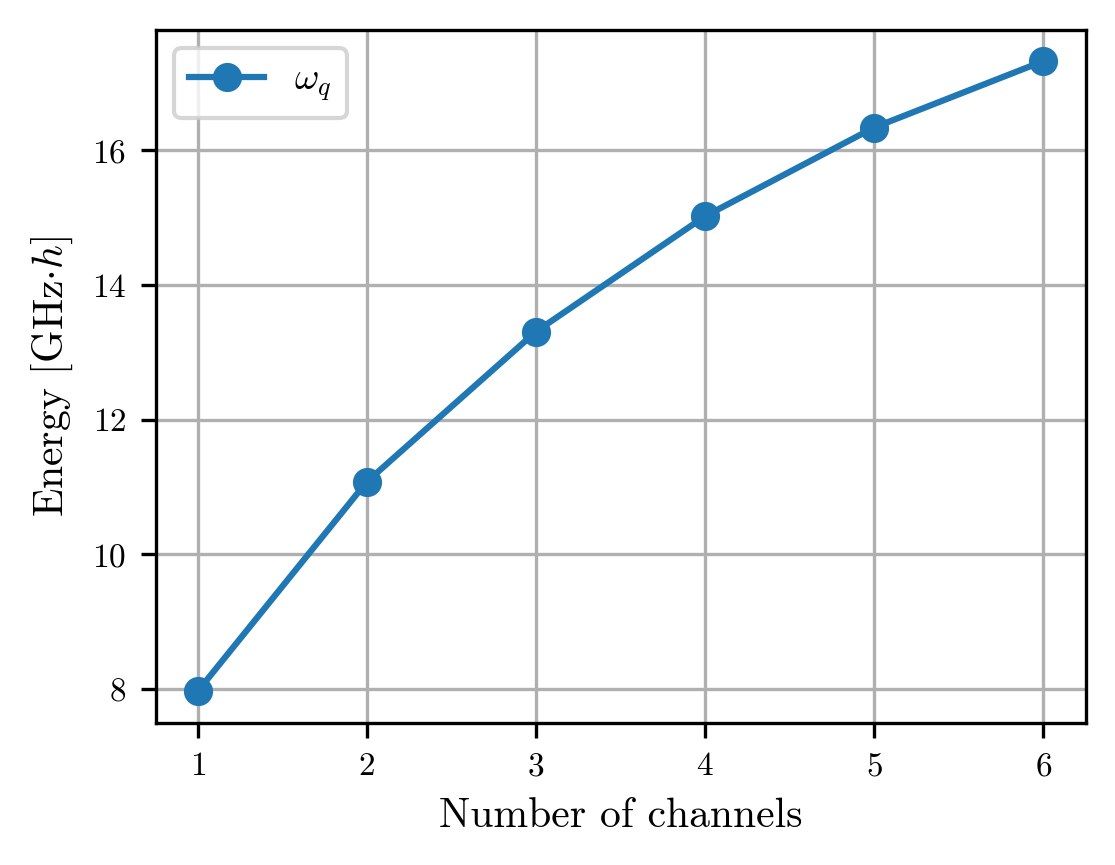

In [282]:
#for i in range(5):
    #plt.plot(channels, E[:,i], "-o")
plt.plot(channels, E[:,1]-E[:,0], "-o", label = r"$\omega_q$")
plt.legend()
#plt.title(r"All channels have $T=1.0$")
plt.xlabel("Number of channels")
plt.ylabel(r"Energy [GHz$\cdot h$]")

Text(0, 0.5, '$T_1$ [ns]')

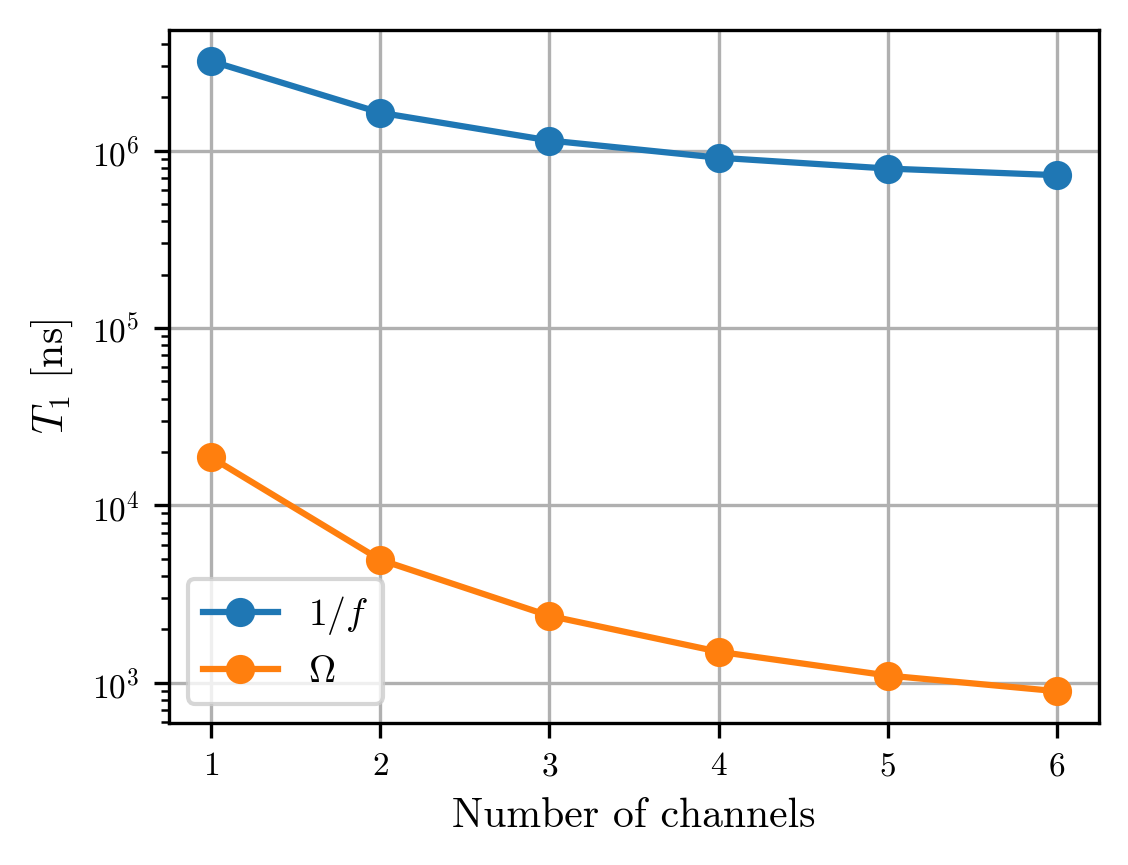

In [283]:
plt.plot(channels, 1/gamma[:,0], "-o", label = r"$1/f$")
plt.plot(channels, 1/gamma[:,1], "-o", label = r"$\Omega$")
plt.legend()
plt.yscale("log")
plt.xlabel("Number of channels")
plt.ylabel(r"$T_1$ [ns]")

In [284]:
multi_T_res = 40

V_gate = np.linspace(-10, 10, multi_T_res)

T_arr = np.zeros((multi_T_res, 3))

T_arr[:,0] = np.tanh(V_gate - 6)/2 + 1/2
T_arr[:,1] = np.tanh(V_gate)/2 + 1/2
T_arr[:,2] = np.tanh(V_gate + 6)/2 + 1/2

Text(0.5, 0, 'Arb. voltage')

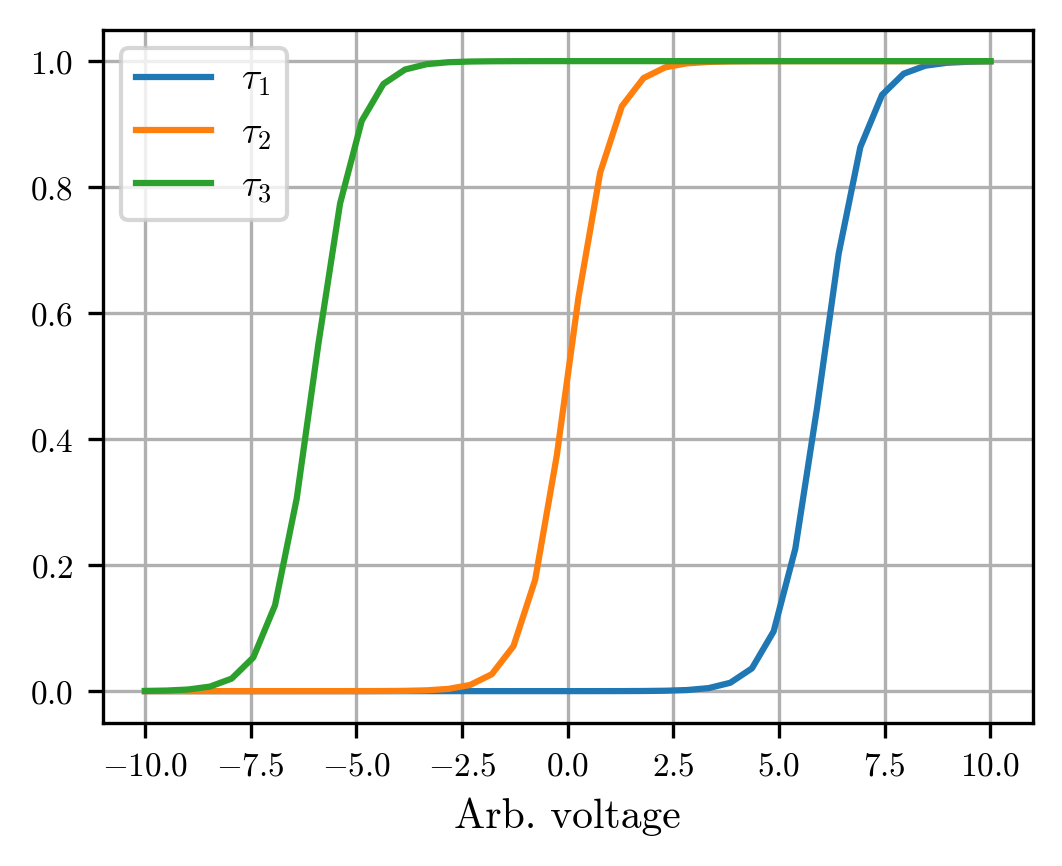

In [285]:
plt.plot(V_gate, T_arr[:,0], label = r"$\tau_1$")
plt.plot(V_gate, T_arr[:,1], label = r"$\tau_2$")
plt.plot(V_gate, T_arr[:,2], label = r"$\tau_3$")
plt.legend()
plt.xlabel("Arb. voltage")

In [286]:
three_channel_gatemon = Qubits.gatemon_flux(40, delta/200, delta, [0.1, 0.1, 0.1], 0)

frequency = np.zeros(multi_T_res)
gamma3 = np.zeros((2, multi_T_res))


In [287]:
for i in range(multi_T_res):
    three_channel_gatemon.T = T_arr[i,:]
    three_channel_gatemon.solve()
    frequency[i] = three_channel_gatemon.eigvals[1] - three_channel_gatemon.eigvals[0]

    gamma3[:,i] = three_channel_gatemon.T_1_gamma()

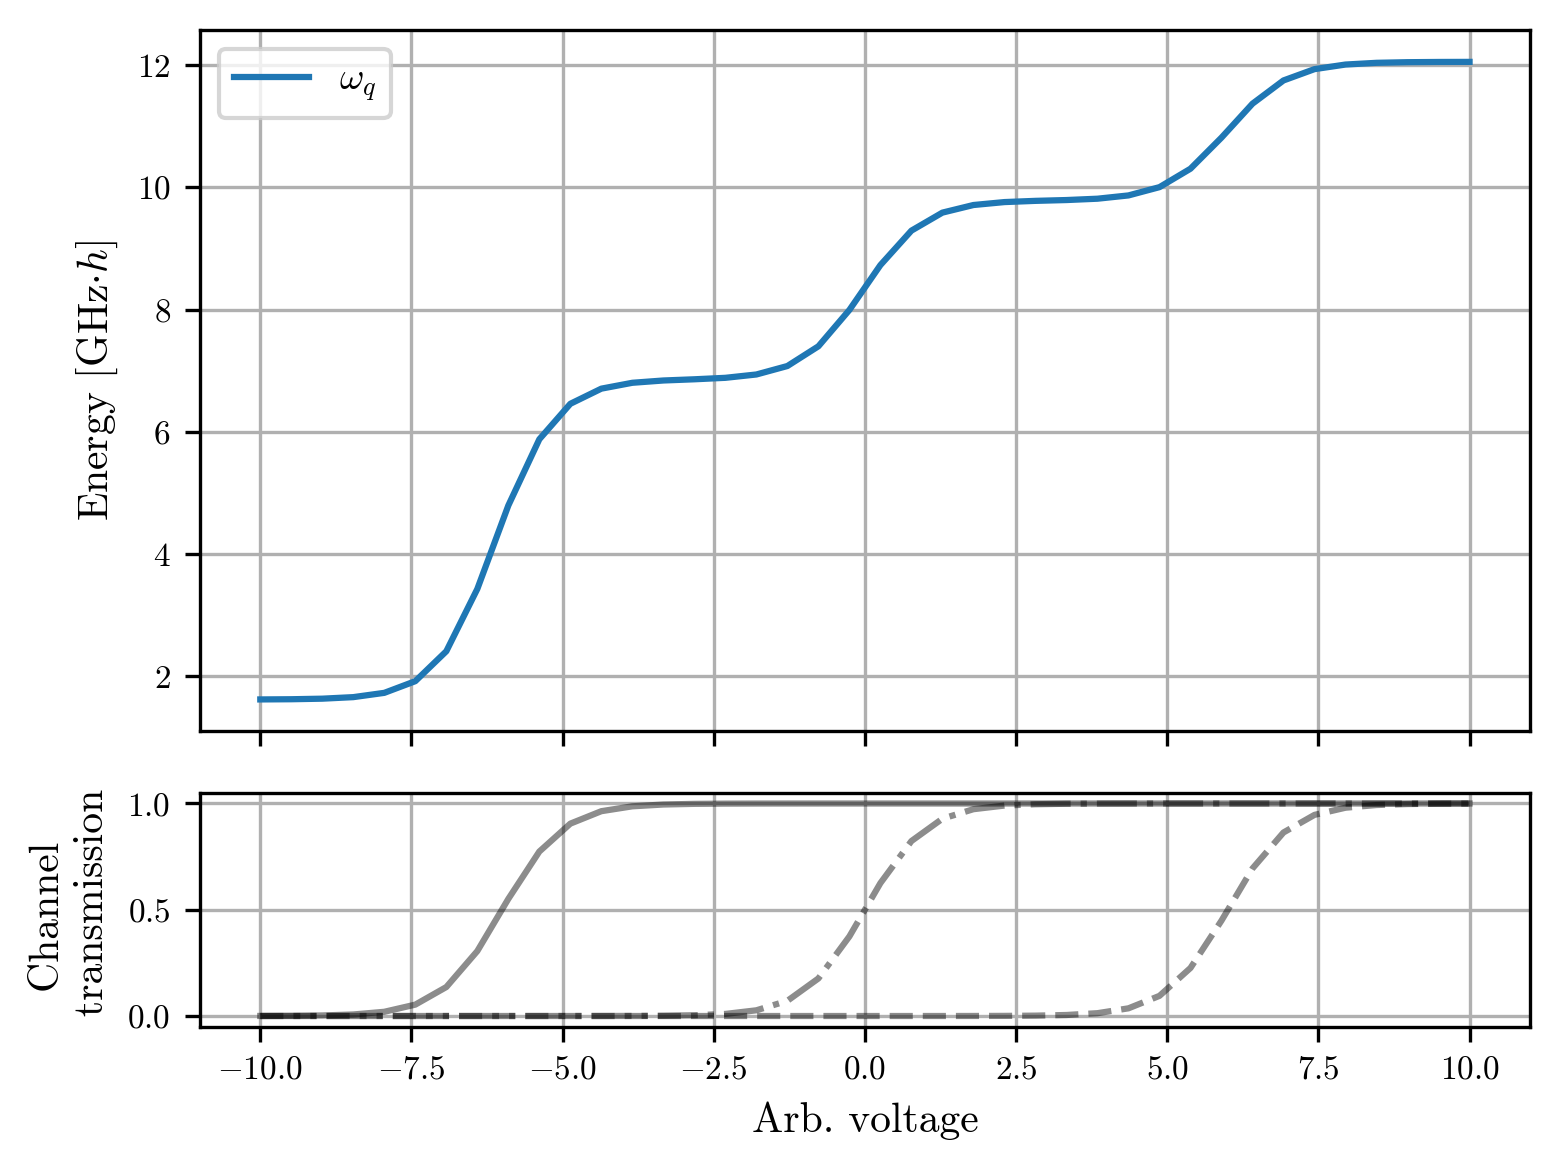

In [288]:
fig, ax = plt.subplots(2,1, figsize=((5.3, 4)), height_ratios=[3,1], sharex = True)


ax[0].plot(V_gate, frequency, label = r"$\omega_q$")
ax[0].set_ylabel(r"Energy [GHz$\cdot h$]")
ax[0].legend()
ax[1].plot(V_gate, T_arr[:,0], '--', color = "black", alpha = 0.45)
ax[1].plot(V_gate, T_arr[:,1], '-.', color = "black", alpha = 0.45)
ax[1].plot(V_gate, T_arr[:,2], color = "black", alpha = 0.45)
ax[1].set_xlabel("Arb. voltage")
ax[1].set_ylabel("Channel \n transmission")
fig.tight_layout()

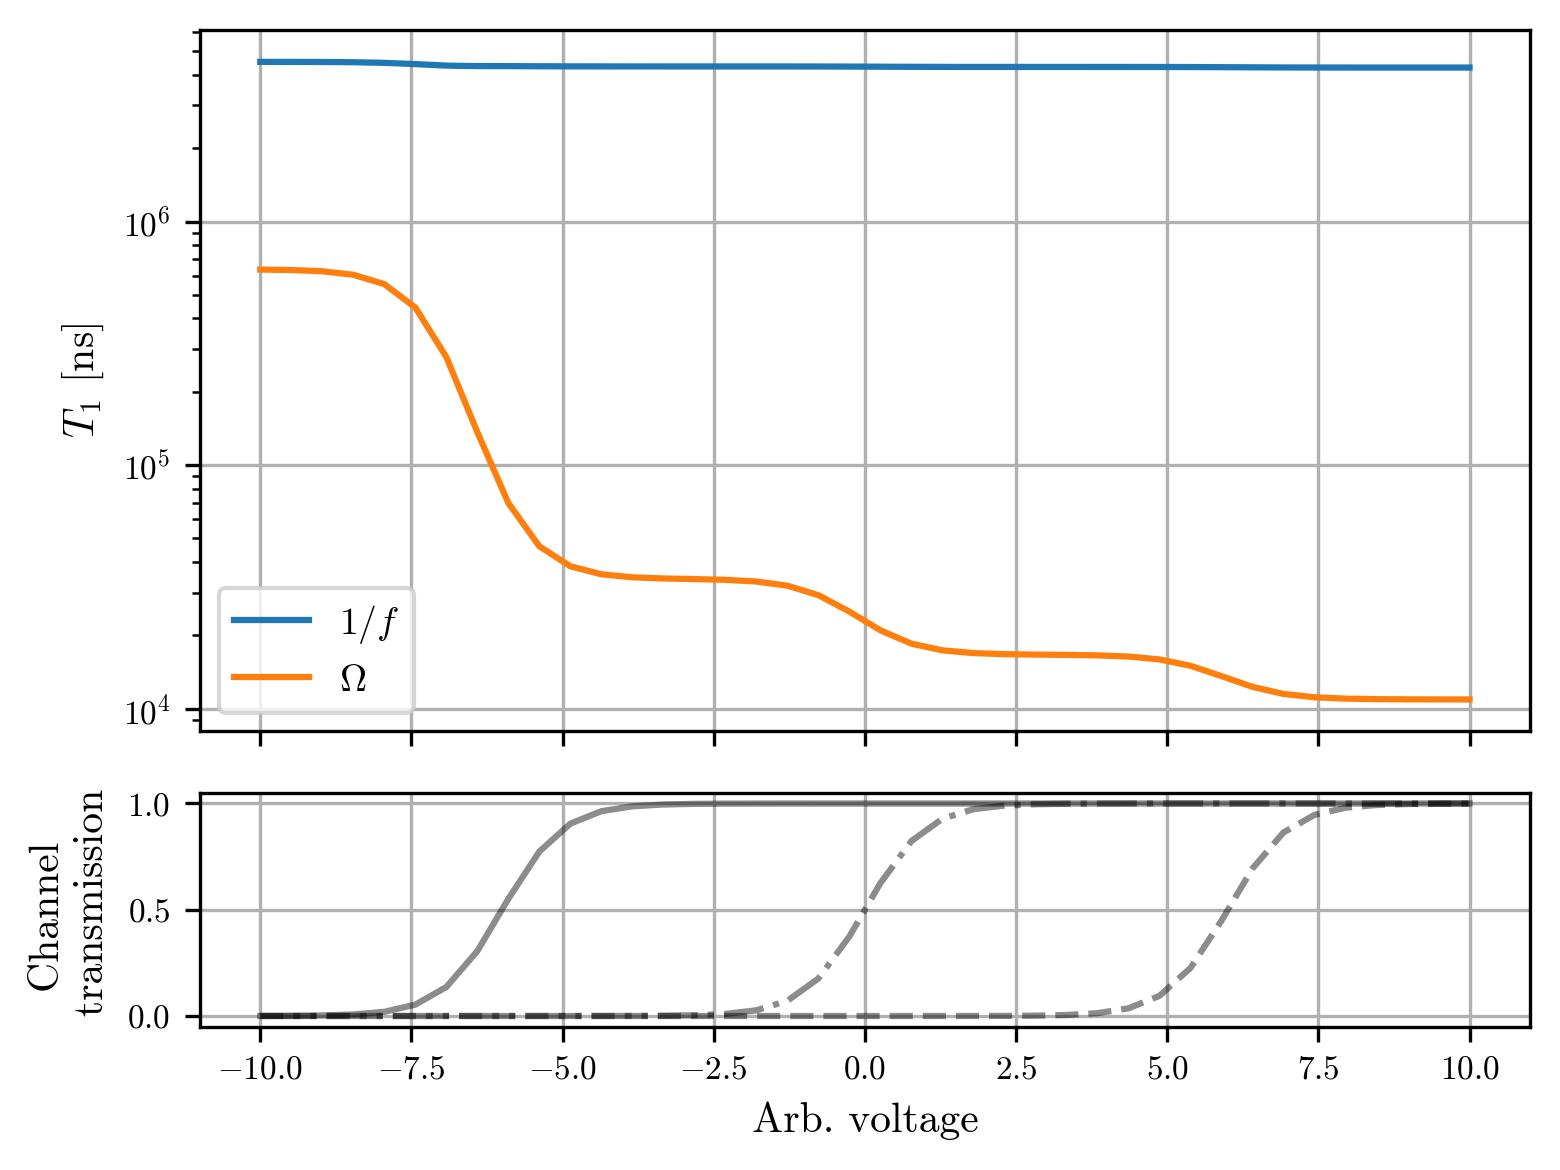

In [289]:
fig, ax = plt.subplots(2,1, figsize=((5.3, 4)), height_ratios=[3,1], sharex = True)

ax[0].plot(V_gate, 1/gamma3[0,:], label = r"$1/f$")
ax[0].plot(V_gate, 1/gamma3[1,:], label = r"$\Omega$")
#ax[0].plot(V_gate, 1/(gamma3[0,:] + gamma3[1,:]), label = "Total")
ax[0].legend()
ax[0].set_yscale("log")
ax[0].set_ylabel(r"$T_1$ [ns]")

ax[1].plot(V_gate, T_arr[:,0], '--', color = "black", alpha = 0.45)
ax[1].plot(V_gate, T_arr[:,1], '-.', color = "black", alpha = 0.45)
ax[1].plot(V_gate, T_arr[:,2], color = "black", alpha = 0.45)
ax[1].set_xlabel("Arb. voltage")
ax[1].set_ylabel("Channel \n transmission")
fig.tight_layout()